### Projet Maching learning


### lebrary

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
import string
import io
from sklearn import preprocessing
import operator
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import string
import operator
from scipy.stats import pearsonr
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression, make_circles

import statsmodels.stats.multicomp as multi 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 

### Importation de dataset

In [6]:
data= pd.read_csv('C:/Users/cheit/Desktop/r studio/housing.csv')

In [7]:
data[12:20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000


In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Analyse


In [9]:
df = data.copy()

In [10]:
df.shape

(1460, 81)

In [11]:
df.dtypes # les types de variable

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<AxesSubplot:ylabel='None'>

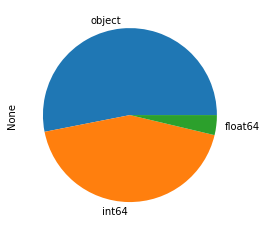

In [12]:
df.dtypes.value_counts().plot.pie() # la proportion des differentes variable

In [13]:
df.isna

<bound method DataFrame.isna of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

<AxesSubplot:>

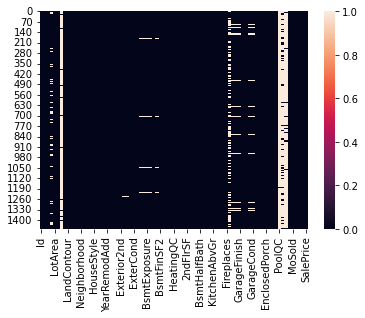

In [14]:
sns.heatmap(df.isna()) # un e cartographie de notre dataset pour voir les variable presentant le plus de na

In [15]:
# les formes de distributions de nos données de types float

<Figure size 432x288 with 0 Axes>

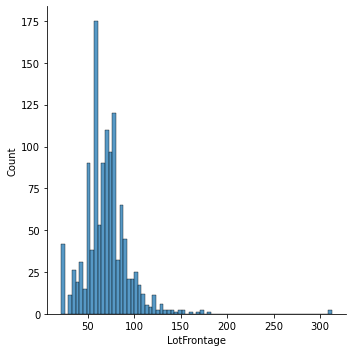

<Figure size 432x288 with 0 Axes>

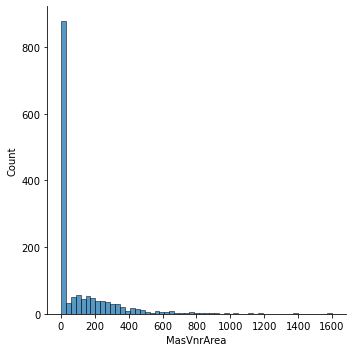

<Figure size 432x288 with 0 Axes>

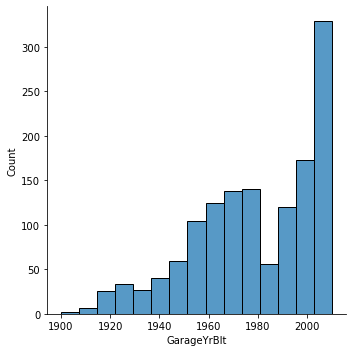

In [16]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col]) 

In [17]:
# la forme de distribution de nos variable de type integer

C:\Users\cheit\AppData\Local\Temp/ipykernel_37200/2414076389.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

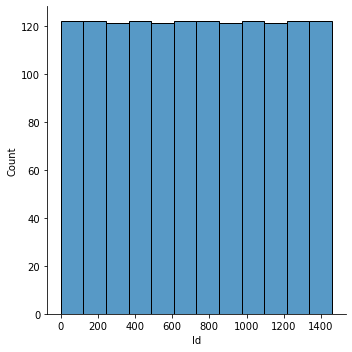

<Figure size 432x288 with 0 Axes>

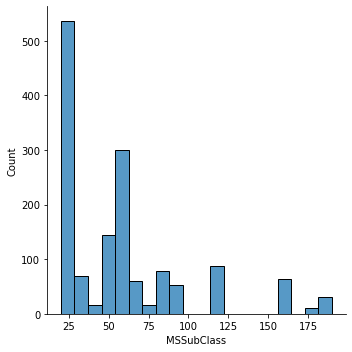

<Figure size 432x288 with 0 Axes>

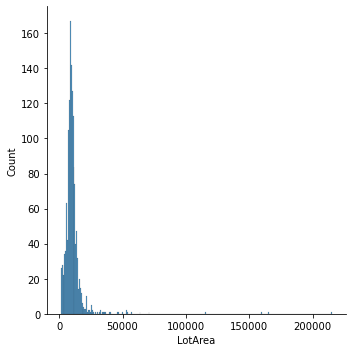

<Figure size 432x288 with 0 Axes>

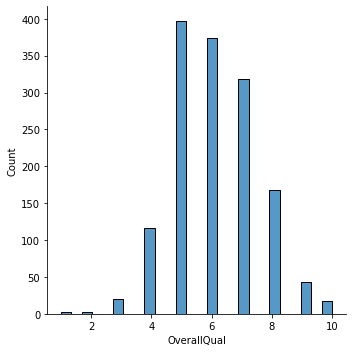

<Figure size 432x288 with 0 Axes>

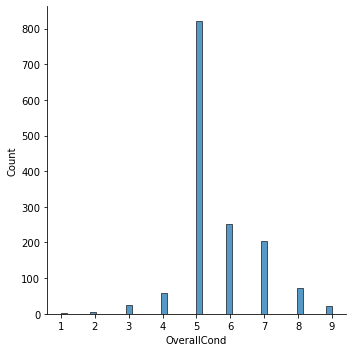

<Figure size 432x288 with 0 Axes>

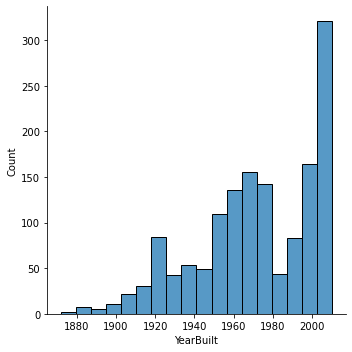

<Figure size 432x288 with 0 Axes>

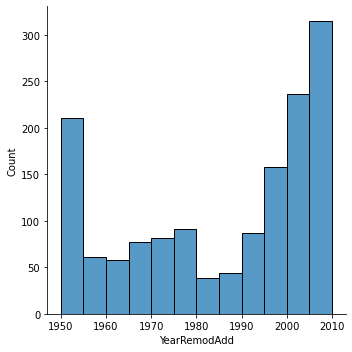

<Figure size 432x288 with 0 Axes>

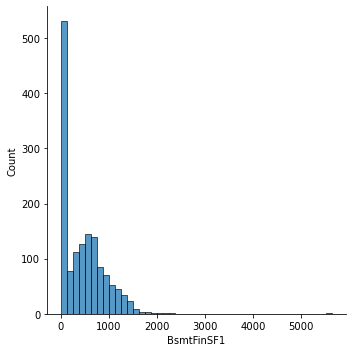

<Figure size 432x288 with 0 Axes>

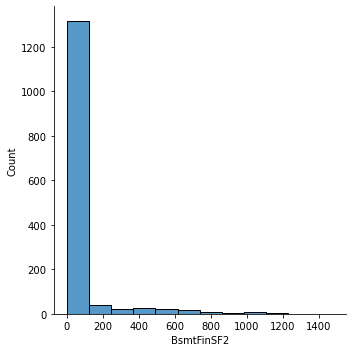

<Figure size 432x288 with 0 Axes>

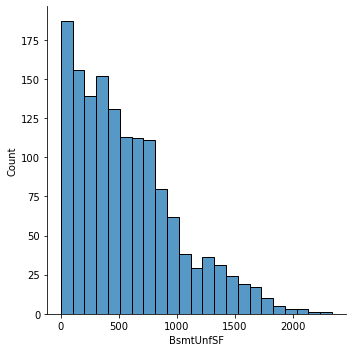

<Figure size 432x288 with 0 Axes>

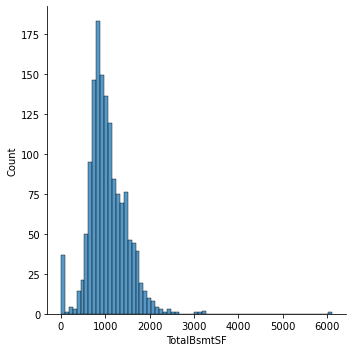

<Figure size 432x288 with 0 Axes>

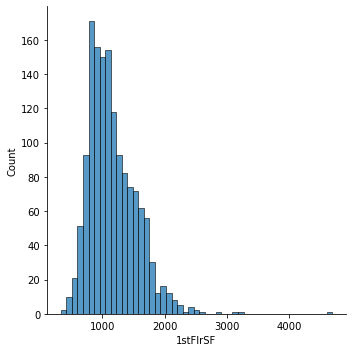

<Figure size 432x288 with 0 Axes>

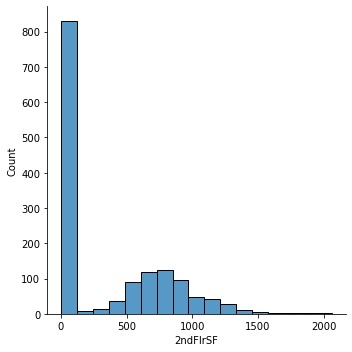

<Figure size 432x288 with 0 Axes>

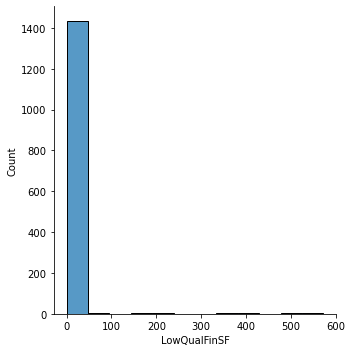

<Figure size 432x288 with 0 Axes>

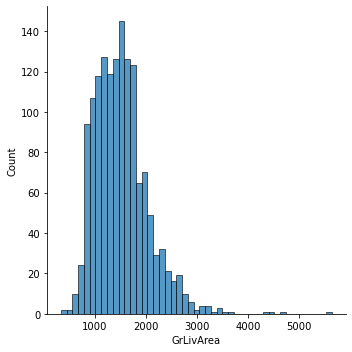

<Figure size 432x288 with 0 Axes>

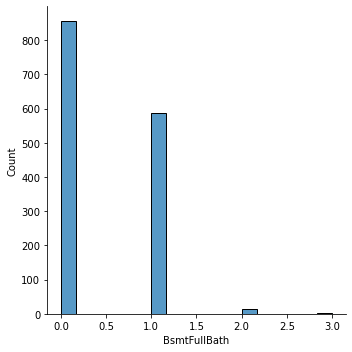

<Figure size 432x288 with 0 Axes>

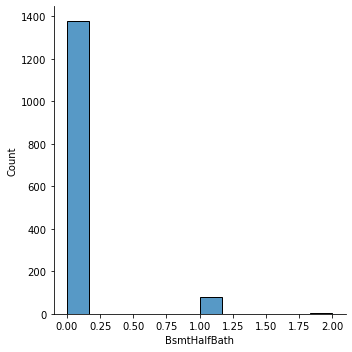

<Figure size 432x288 with 0 Axes>

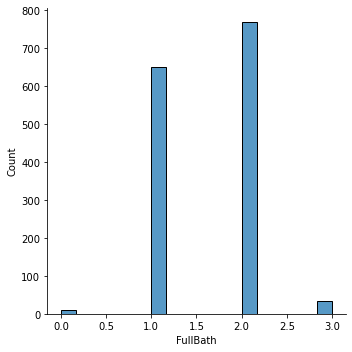

<Figure size 432x288 with 0 Axes>

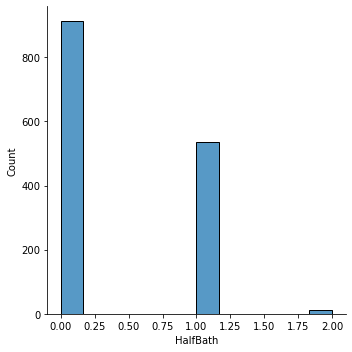

<Figure size 432x288 with 0 Axes>

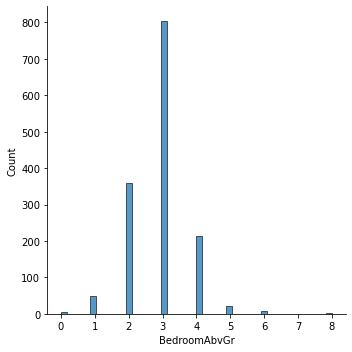

<Figure size 432x288 with 0 Axes>

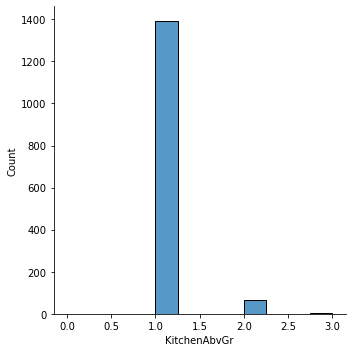

<Figure size 432x288 with 0 Axes>

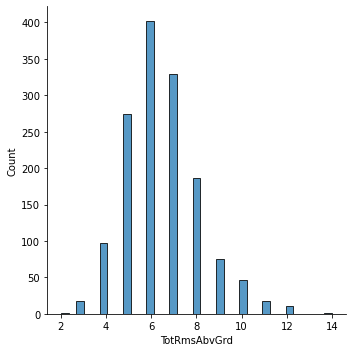

<Figure size 432x288 with 0 Axes>

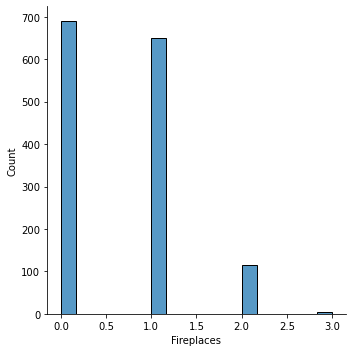

<Figure size 432x288 with 0 Axes>

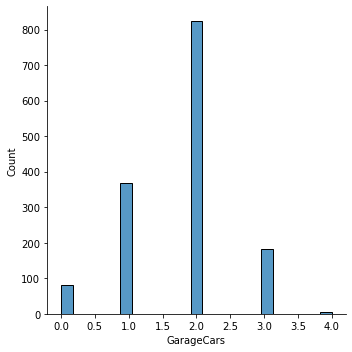

<Figure size 432x288 with 0 Axes>

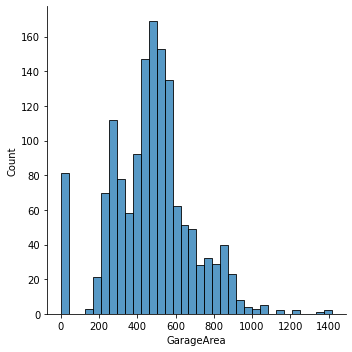

<Figure size 432x288 with 0 Axes>

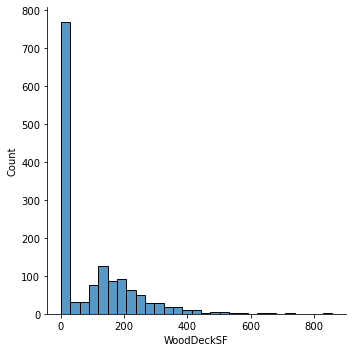

<Figure size 432x288 with 0 Axes>

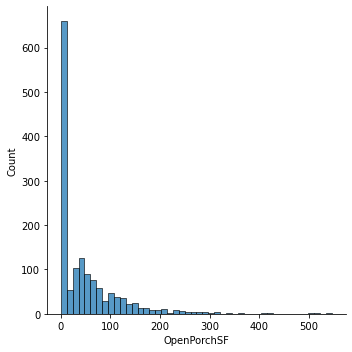

<Figure size 432x288 with 0 Axes>

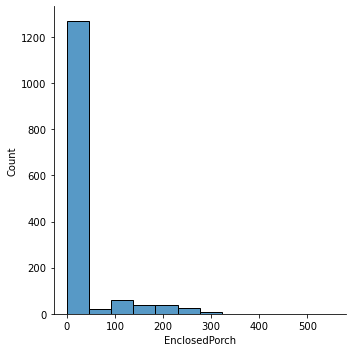

<Figure size 432x288 with 0 Axes>

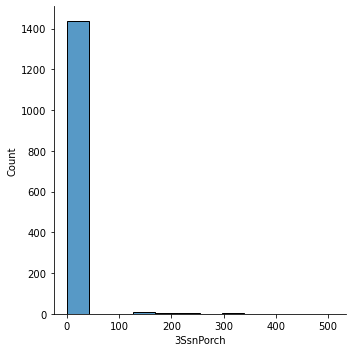

<Figure size 432x288 with 0 Axes>

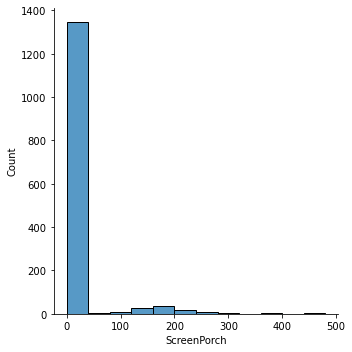

<Figure size 432x288 with 0 Axes>

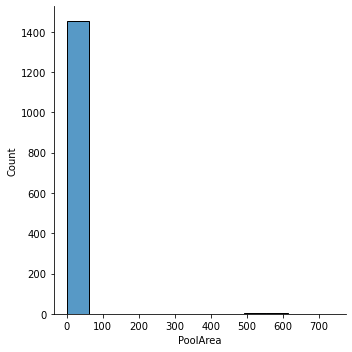

<Figure size 432x288 with 0 Axes>

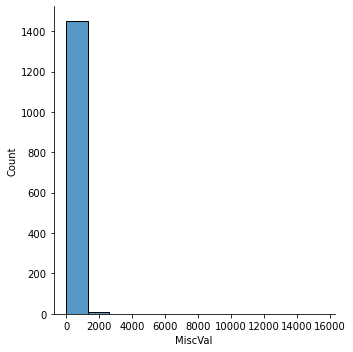

<Figure size 432x288 with 0 Axes>

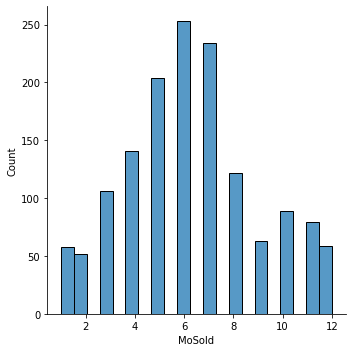

<Figure size 432x288 with 0 Axes>

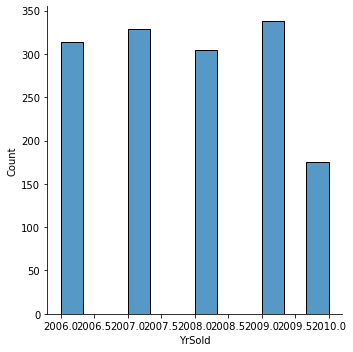

<Figure size 432x288 with 0 Axes>

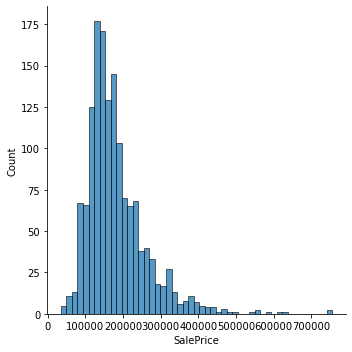

In [18]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.displot(df[col])

In [22]:
#Voir le nom de chaque variables
for idx,column in enumerate(df.columns):
     print(idx,column)

0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 Alley
7 LotShape
8 LandContour
9 Utilities
10 LotConfig
11 LandSlope
12 Neighborhood
13 Condition1
14 Condition2
15 BldgType
16 HouseStyle
17 OverallQual
18 OverallCond
19 YearBuilt
20 YearRemodAdd
21 RoofStyle
22 RoofMatl
23 Exterior1st
24 Exterior2nd
25 MasVnrType
26 MasVnrArea
27 ExterQual
28 ExterCond
29 Foundation
30 BsmtQual
31 BsmtCond
32 BsmtExposure
33 BsmtFinType1
34 BsmtFinSF1
35 BsmtFinType2
36 BsmtFinSF2
37 BsmtUnfSF
38 TotalBsmtSF
39 Heating
40 HeatingQC
41 CentralAir
42 Electrical
43 1stFlrSF
44 2ndFlrSF
45 LowQualFinSF
46 GrLivArea
47 BsmtFullBath
48 BsmtHalfBath
49 FullBath
50 HalfBath
51 BedroomAbvGr
52 KitchenAbvGr
53 KitchenQual
54 TotRmsAbvGrd
55 Functional
56 Fireplaces
57 FireplaceQu
58 GarageType
59 GarageYrBlt
60 GarageFinish
61 GarageCars
62 GarageArea
63 GarageQual
64 GarageCond
65 PavedDrive
66 WoodDeckSF
67 OpenPorchSF
68 EnclosedPorch
69 3SsnPorch
70 ScreenPorch
71 PoolArea
72 PoolQC
73 Fence


In [19]:
# Selectioner juste les colones qui nous interesse

In [20]:
# Calcul des corrélation
numeric_data = df.select_dtypes(include=[np.number])


<AxesSubplot:>

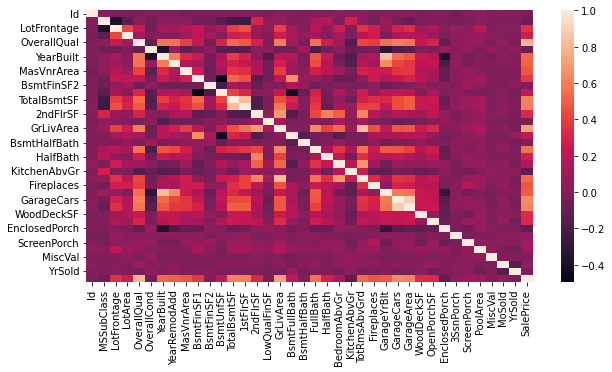

In [70]:
# tableau de corrélation
corr = numeric_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr)

In [71]:
print (corr['SalePrice'].sort_values(ascending=False)[:20]) # colération des variables numerique

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


In [72]:
# Nouveau dataset numérique avec la selection des 10 variables numeriques qui ont la plus fortes corelations par rapport à SalePrice
newDataNum= df[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd']]
newDataNum.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [73]:
# réindexer le dataframe numérique
newDataNum.reset_index(level=None, drop=False, inplace=False, col_level=0)

,index,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


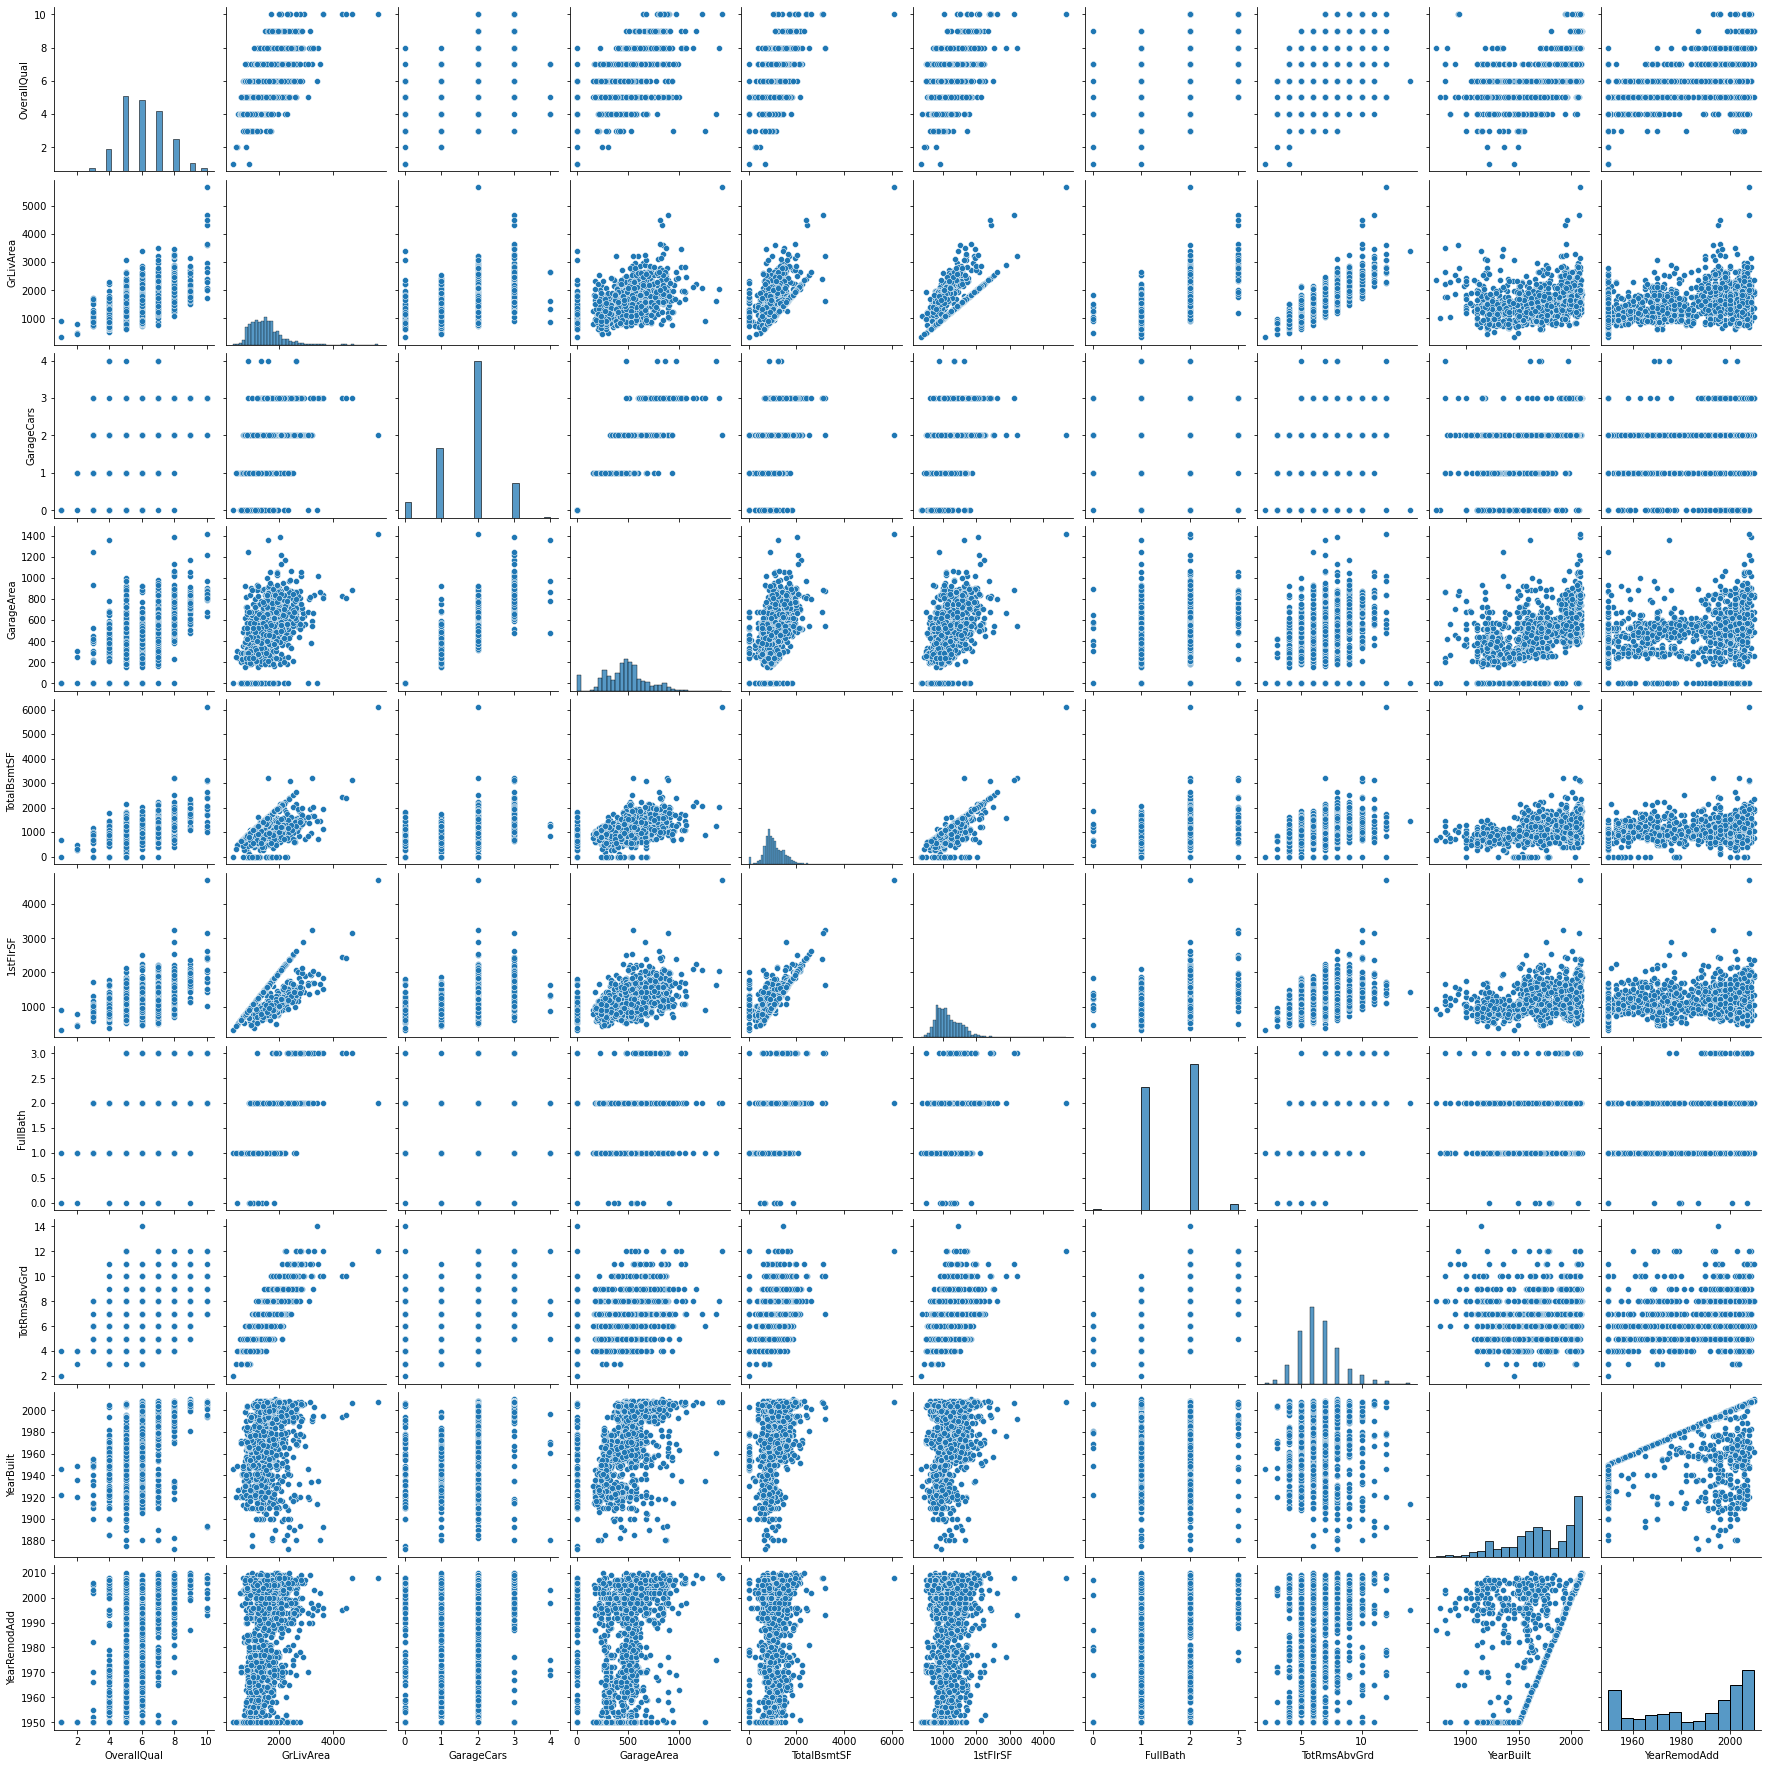

In [74]:
sns.pairplot(newDataNum.iloc[:,1:12])

In [75]:
# Nombre des données manquantes par colonne
non_empty_headers = []
for col in newDataNum.columns.values:
    print("COL: " + str(col))
    total_rows = len(df[col])
    print("TOTAL LIGNES: " + str(total_rows))
    empty_rows_sum = newDataNum[col].isnull().sum()
    print("TOTAL LIGNES VIDE: " + str(empty_rows_sum))
    total_values = total_rows - empty_rows_sum
    print("TOTAL LIGNES NON-VIDES: " + str(total_values))
    print("--------------------------")
    if total_values > 1:
        col_name = str(col).strip()
        non_empty_headers.append(col)

stripped_data = newDataNum[non_empty_headers]



COL: SalePrice
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: OverallQual
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: GrLivArea
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: GarageCars
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: GarageArea
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: TotalBsmtSF
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: 1stFlrSF
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: FullBath
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
--------------------------
COL: TotRmsAbvGrd
TOTAL LIGNES: 1460
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 1460
---------------------

### Traitement des données de type categoriel en binaire our ensuite calculer la corelation

In [76]:
# traitement des données catégoriques
cat_data = df.select_dtypes(exclude=[np.number])
print(cat_data)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

In [121]:
# transformarion des variables categorielles
le = preprocessing.LabelEncoder()
for i in cat_data:
  cat_data[i]= le.fit_transform(cat_data[i])

C:\Users\cheit\AppData\Local\Temp/ipykernel_37200/210139335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i]= le.fit_transform(cat_data[i])


In [122]:
cat_data.head

<bound method NDFrame.head of       MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0            3       1      2         3            3          0          4   
1            3       1      2         3            3          0          2   
2            3       1      2         0            3          0          4   
3            3       1      2         0            3          0          0   
4            3       1      2         0            3          0          2   
...        ...     ...    ...       ...          ...        ...        ...   
1455         3       1      2         3            3          0          4   
1456         3       1      2         3            3          0          4   
1457         3       1      2         3            3          0          4   
1458         3       1      2         3            3          0          4   
1459         3       1      2         3            3          0          4   

      LandSlope  Neighborhood  Co

In [123]:
trans = cat_data.reset_index(level=None, drop=False, inplace=False, col_level=0)
trans

,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,3,1,2,3,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
1,1,3,1,2,3,3,0,2,0,24,...,1,1,4,4,2,3,4,4,8,4
2,2,3,1,2,0,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
3,3,3,1,2,0,3,0,0,0,6,...,5,2,4,4,2,3,4,4,8,0
4,4,3,1,2,0,3,0,2,0,15,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,3,1,2,3,3,0,4,0,8,...,1,1,4,4,2,3,4,4,8,4
1456,1456,3,1,2,3,3,0,4,0,14,...,1,2,4,4,2,3,2,4,8,4
1457,1457,3,1,2,3,3,0,4,0,6,...,1,1,4,4,2,3,0,2,8,4
1458,1458,3,1,2,3,3,0,4,0,12,...,1,2,4,4,2,3,4,4,8,4


In [124]:
# Ajout de Saleprice
p= df['SalePrice']
p

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [125]:
# Ajout saleprice dans le dataframe categoriel
frames = [p , trans]
NcatDdata = pd.concat(frames, axis=1 )
NcatDdata

,SalePrice,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,208500,0,3,1,2,3,3,0,4,0,...,1,1,4,4,2,3,4,4,8,4
1,181500,1,3,1,2,3,3,0,2,0,...,1,1,4,4,2,3,4,4,8,4
2,223500,2,3,1,2,0,3,0,4,0,...,1,1,4,4,2,3,4,4,8,4
3,140000,3,3,1,2,0,3,0,0,0,...,5,2,4,4,2,3,4,4,8,0
4,250000,4,3,1,2,0,3,0,2,0,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1455,3,1,2,3,3,0,4,0,...,1,1,4,4,2,3,4,4,8,4
1456,210000,1456,3,1,2,3,3,0,4,0,...,1,2,4,4,2,3,2,4,8,4
1457,266500,1457,3,1,2,3,3,0,4,0,...,1,1,4,4,2,3,0,2,8,4
1458,142125,1458,3,1,2,3,3,0,4,0,...,1,2,4,4,2,3,4,4,8,4


<AxesSubplot:>

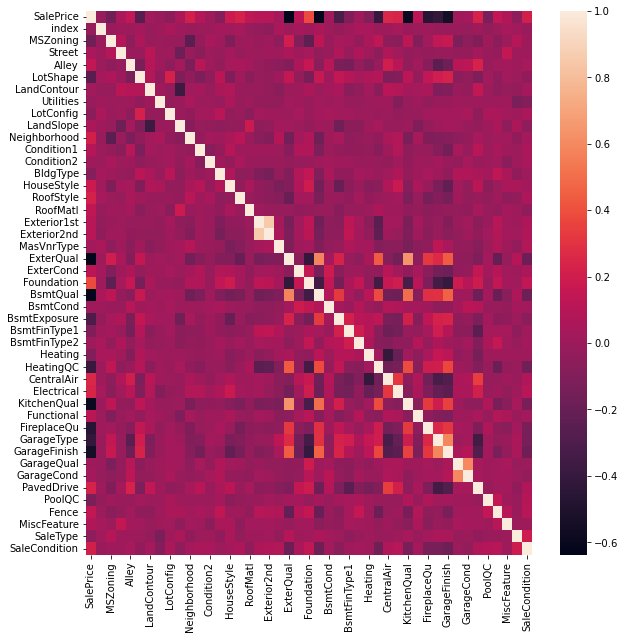

In [126]:
heat_map = NcatDdata.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(heat_map)

In [127]:
print (heat_map['SalePrice'].sort_values(ascending=False)[:20])# calucle de coloretion sur les variable categoriel transformer 

SalePrice        1.000000
Foundation       0.382479
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
Fence            0.140640
Alley            0.139868
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
Exterior2nd      0.103766
Exterior1st      0.103551
Condition1       0.091155
MiscFeature      0.073609
LandSlope        0.051152
Street           0.041036
Name: SalePrice, dtype: float64


In [128]:
# création de dataset catégorielle final
newDCat=trans[['Foundation', 'CentralAir', 'Electrical', 'PavedDrive', 'RoofStyle', 'SaleCondition', 'Neighborhood', 'HouseStyle', 'Fence','Alley']]
newDCat.head()

,Foundation,CentralAir,Electrical,PavedDrive,RoofStyle,SaleCondition,Neighborhood,HouseStyle,Fence,Alley
0,2,1,4,2,1,4,5,5,4,2
1,1,1,4,2,1,4,24,2,4,2
2,2,1,4,2,1,4,5,5,4,2
3,0,1,4,2,1,0,6,5,4,2
4,2,1,4,2,1,4,15,5,4,2


In [129]:
# merge dataset num et cat
# Ajout saleprice dans le dataframe categoriel
frames = [newDataNum , newDCat]
DataFinal = pd.concat(frames, axis=1 )
DataFinal

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Foundation,CentralAir,Electrical,PavedDrive,RoofStyle,SaleCondition,Neighborhood,HouseStyle,Fence,Alley
0,208500,7,1710,2,548,856,856,2,8,2003,...,2,1,4,2,1,4,5,5,4,2
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1,1,4,2,1,4,24,2,4,2
2,223500,7,1786,2,608,920,920,2,6,2001,...,2,1,4,2,1,4,5,5,4,2
3,140000,7,1717,3,642,756,961,1,7,1915,...,0,1,4,2,1,0,6,5,4,2
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,2,1,4,2,1,4,15,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,2,1,4,2,1,4,8,5,4,2
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,1,1,4,2,1,4,14,2,2,2
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,4,1,4,2,1,4,6,5,0,2
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,1,1,0,2,3,4,12,2,4,2


In [130]:
#normalization
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler = MinMaxScaler()

# Normaliser les colonnes du DataFrame
df_normalized = scaler.fit_transform(DataFinal)

# Créer un nouveau DataFrame avec les données normalisées
df_normalized = pd.DataFrame(df_normalized, columns=DataFinal.columns)

# Afficher le DataFrame normalisé
print(df_normalized)

      SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0      0.241078     0.666667   0.259231        0.50    0.386460     0.140098   
1      0.203583     0.555556   0.174830        0.50    0.324401     0.206547   
2      0.261908     0.666667   0.273549        0.50    0.428773     0.150573   
3      0.145952     0.666667   0.260550        0.75    0.452750     0.123732   
4      0.298709     0.777778   0.351168        0.75    0.589563     0.187398   
...         ...          ...        ...         ...         ...          ...   
1455   0.194556     0.555556   0.247362        0.50    0.324401     0.155974   
1456   0.243161     0.555556   0.327619        0.50    0.352609     0.252373   
1457   0.321622     0.666667   0.377920        0.25    0.177715     0.188543   
1458   0.148903     0.444444   0.140166        0.25    0.169252     0.176432   
1459   0.156367     0.444444   0.173700        0.25    0.194640     0.205565   

      1stFlrSF  FullBath  TotRmsAbvGrd 

In [132]:
# réindexation dataset
s= df_normalized.reset_index(level=None, drop=False, inplace=False, col_level=0)
s

,index,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,...,Foundation,CentralAir,Electrical,PavedDrive,RoofStyle,SaleCondition,Neighborhood,HouseStyle,Fence,Alley
0,0,0.241078,0.666667,0.259231,0.50,0.386460,0.140098,0.119780,0.666667,0.500000,...,0.4,1.0,0.8,1.0,0.2,0.8,0.208333,0.714286,1.0,1.0
1,1,0.203583,0.555556,0.174830,0.50,0.324401,0.206547,0.212942,0.666667,0.333333,...,0.2,1.0,0.8,1.0,0.2,0.8,1.000000,0.285714,1.0,1.0
2,2,0.261908,0.666667,0.273549,0.50,0.428773,0.150573,0.134465,0.666667,0.333333,...,0.4,1.0,0.8,1.0,0.2,0.8,0.208333,0.714286,1.0,1.0
3,3,0.145952,0.666667,0.260550,0.75,0.452750,0.123732,0.143873,0.333333,0.416667,...,0.0,1.0,0.8,1.0,0.2,0.0,0.250000,0.714286,1.0,1.0
4,4,0.298709,0.777778,0.351168,0.75,0.589563,0.187398,0.186095,0.666667,0.583333,...,0.4,1.0,0.8,1.0,0.2,0.8,0.625000,0.714286,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,0.194556,0.555556,0.247362,0.50,0.324401,0.155974,0.142038,0.666667,0.416667,...,0.4,1.0,0.8,1.0,0.2,0.8,0.333333,0.714286,1.0,1.0
1456,1456,0.243161,0.555556,0.327619,0.50,0.352609,0.252373,0.399036,0.666667,0.416667,...,0.2,1.0,0.8,1.0,0.2,0.8,0.583333,0.285714,0.5,1.0
1457,1457,0.321622,0.666667,0.377920,0.25,0.177715,0.188543,0.195961,0.666667,0.583333,...,0.8,1.0,0.8,1.0,0.2,0.8,0.250000,0.714286,0.0,1.0
1458,1458,0.148903,0.444444,0.140166,0.25,0.169252,0.176432,0.170721,0.333333,0.250000,...,0.2,1.0,0.0,1.0,0.6,0.8,0.500000,0.285714,1.0,1.0


### Modélisation

### Lineaire

In [133]:
x = s.drop(['SalePrice', 'index'], axis=1)
y = s['SalePrice']

In [134]:
x_train, x_test,y_train , y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [135]:
# normalisation
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [136]:
# construire le modele

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [137]:
# predict
y_pred = reg.predict(x_test)

In [138]:
a = reg.coef_
b = reg.intercept_

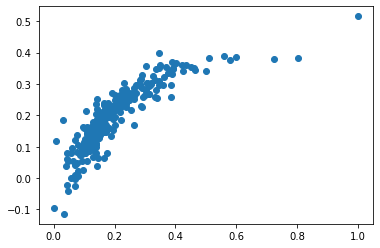

In [139]:
plt.scatter(y_test,y_pred )
plt.show()

In [112]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.716


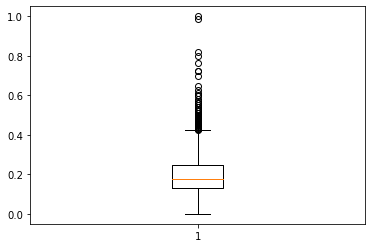

In [140]:
plt.boxplot(y)
plt.show()

In [141]:
s= np.array(s)

In [142]:
x_train,x_test,y_train,y_test=train_test_split(y, x,test_size=0.25, random_state=2020)

In [143]:
x = np.array(x)
y = np.array(y)

In [146]:
x = x.reshape(-1, 1)
y = y.reshape(1, -1)

In [147]:
#On importe l'algorithme à partir de sklearn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
rf.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[0.17775309 0.15942231 0.18344675 ... 0.34517846 0.09943064 0.29951397].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [148]:
#On applique le modèle que l'on vient 
#d'entraîner sur l'échantillon de test
predictions = rf.predict(x_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [149]:
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

NameError: name 'erreurs' is not defined

### Validation des différentes modelles voir Diapo